# 1 Task Understanding

## **Задача**

На нашем маркетплейсе ежедневно появляются сотни новых товаров. Однако, проверить правильность заполнения информации обо всех товарах сразу невозможно. Неверно определенная категория зачастую приводит к потенциально упущенной прибыли как со стороны продавца, так и со стороны маркетплейса. Мы хотим научиться предсказывать категорию на основе описания, картинки и других параметрах товаров.

### **Формат входных данных**

По [ссылке на google drive](https://drive.google.com/drive/folders/1a1OwG0gUEovQLiMSIfiSHA2g3DsZ62P0?usp=sharing) **лежит архив с файлами:**

**train.parquet** - `pandas.DataFrame` с товарами на маркетплейсе. У каждого товара есть:

- *product_id* - *идентификатор товара*
- ************text_fields -************ строка-словарь со следующими полями:
    - *title - заголовок*
    - *description - описание*
    - **********attributes - на сайте они находятся в карточке товара**********
    
    ![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/d25c0307-6695-4461-9d8a-5c370a456c06/Untitled.png)
    
    - *custom_characteristics, defined_characteristics, filters - вложенные словари с ключами – названиями полей-признаков и значениями – возможными значениями этих признаков (например, Цвет: Белый / Черный)*
- *rating - средний рейтинг товара*
- *******sale******* - *флаг, обозначающий находится ли товар в распродаже*
- *shop_id (seller_id) - id магазина (id-продавца)*
- ********shop_title******** - *название магазина*
- *category_id - категория товара (таргет)*
- ***************category_name - название категории товара с точки зрения дерева категорий KazanExpress***************

**test.parquet** - файл, идентичный **train.parquet**, ****но без реального *category_id*, именно его вам и предстоит предсказать.

**************images************** – папка с двумя подпапками: ******train****** и *****test***** для картинок товаров из, соответственно,  обучающей и тестовой выборки. Названия файлов соответствуют ***product_id*** товаров. 

❗️❗️❗️ Файлы *train* и *test* представлены в формате *parquet*, в котором мы ожидаем получить от вас выходной файл.

### **Метрики**

Целью задания является предсказание категории товара. Соответственно, надо решить задачу многоклассовой классификации. В качестве метрики для задания выбран [взвешенный F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/d37b459b-ab33-419d-a75a-573c64a7d93d/Untitled.png)

$**Pweighted$** - взвешенный $Precision$

$Rweighted$  - взвешенный $Recall$

### **Требования к решению**

Решение должно быть загружено по [ссылке](https://forms.gle/Atrb8ZjUFpcdS6cr5) в виде zip-архива, который содержит в корне:

- папку `solution` со всеми *.py и *.ipynb файлами
- файл `result.parquet`

Файл `result.parquet` должен содержать две колонки:

- **product_id** - идентификатор товара из `test.parquet`
- **predicted_category_id** - категория, предсказанная вашей моделью, для соответствующего **product_id.**

В **solution** должно быть отражено исследование и весь код, необходимый для воспроизведения решения. Мы рассчитываем на чистоту кода, оформление и последовательность. Будет круто, если в корне **solution** будет *README.md*

Строгий формат имени zip-архива: `LastName_FirstName.zip` (пример `Ivanov_Ivan.zip`)

### **Критерии оценки**

1. Для оценки финального решения будет использоваться **взвешенный F1 score,** посчитанный на данных из `test.parquet`
2. Чистота кода, оформление и понятность исследования.

Успехов!

# 2 Data Understanding

## 2.1 Import Libraries

In [ ]:
!pip install transformers==4.26.1
!pip install datasets==2.9.0
!pip install sentencepiece==0.1.97

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 11.0 MB/s eta 0:00:0

In [ ]:
import re
import os
import shutil
import random
import time
import zipfile
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from torchvision import datasets, transforms
from torch.nn import functional as F

## 2.2 Hyperparameters and global variables

In [ ]:
PATH_ZIP_FILE = '/content/drive/MyDrive/internship_2023.zip'

PATH_IMAGES_TRAIN = '/content/images/train/'
PATH_IMAGES_TEST = '/content/images/test/'

PATH_IMAGES_TRAIN_CLS = '/content/images/train_cls/'
PATH_IMAGES_TEST_CLS = '/content/images/test_cls/'


In [ ]:
class param:
    is_check_code = False


## 2.3 Helper functions

In [ ]:
def _get_text_embed(text : str, model, tokenizer, max_length) -> np.array:
    """
    https://habr.com/ru/post/562064/
    """
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=max_length)
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [ ]:
def get_df_text_emb(df: pd.DataFrame, col : str, model, 
                    tokenizer, prefix_column_name : str,
                    max_length : int) -> pd.DataFrame:
    features = df[col].apply(_get_text_embed, args=(model, tokenizer, max_length))
    np_to_pd : list = []
    for feats in np.array([np.array(features)]).T:
        feat_obj : list = []
        for feat in feats:
            feat_obj.append(feat)
        np_to_pd.append(np.concatenate(feat_obj))
    columns = [prefix_column_name + '_' + str(i) for i in range(len(np_to_pd[0]))]
    return pd.DataFrame(np_to_pd, columns=columns)

In [ ]:
def _get_img_embed(model, name_layer : str, dloader,
                   device : str, name_model : str, image_datasets) -> pd.DataFrame:
    """
    https://www.learnpytorch.io/04_pytorch_custom_datasets/
    """
    layer = model._modules.get(name_layer)

    def copy_embeddings(m, i, o):
        """
        Copy embeddings from the 'name_layer' layer.
        """
        o = o[:, :, 0, 0].cpu().detach().numpy().tolist()
        outputs.append(o)

    outputs = []
    # attach hook to the penulimate layer
    _ = layer.register_forward_hook(copy_embeddings)
    # Generate image's embeddings for all images in dloader and saves 
    # them in the list outputs
    model.eval()
    target : list = []
    for X, y in tqdm(dloader):
        _ = model(X.to(device))
        target += y
    # flatten list of embeddings to remove batches
    embeddins : list = [item for sublist in outputs for item in sublist]

    df = pd.DataFrame({name_model: map(np.array, embeddins), 
                        'target': map(int, target)})
    prod_dict = {v:k for k, v in image_datasets.class_to_idx.items()}
    df['product_id'] = df['target'].apply(lambda x: int(prod_dict[x]))
    return df[['product_id', name_model]]

In [ ]:
def get_df_img_emb(df_img: pd.DataFrame, name_model : str) -> pd.DataFrame:
    features = df_img[name_model].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    np_to_pd : list = []
    for feats in np.array([np.array(features)]).T:
        feat_obj : list = []
        for feat in feats:
            feat_obj.append(feat)
        np_to_pd.append(np.concatenate(feat_obj))
    columns = [name_model + '_' + str(i) for i in range(len(np_to_pd[0]))]
    return pd.DataFrame(np_to_pd, columns=columns).join(df_img[['product_id']])

## 2.4 Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile(PATH_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall('/content/')

### Load dataframe

In [ ]:
df = pd.read_parquet('/content/train.parquet', engine='pyarrow')
if param.is_check_code: df = df.head(500)
df.head(2)

,product_id,category_id,sale,shop_id,shop_title,rating,text_fields,category_name
0,325286,12171,False,9031,Aksik,5.0,"{""title"": ""Зарядный кабель Borofone BX1 Lightn...",Все категории->Электроника->Смартфоны и телефо...
1,888134,14233,False,18305,Sela,5.0,"{""title"": ""Трусы Sela"", ""description"": ""Трусы-...",Все категории->Одежда->Женская одежда->Белье и...


In [ ]:
df['text_fields'] = df['text_fields'].apply(lambda x: json.loads(x))
df['text_fields'][0].keys()

dict_keys(['title', 'description', 'attributes', 'custom_characteristics', 'defined_characteristics', 'filters'])

In [ ]:
df['title'] = df['text_fields'].apply(lambda x: x['title'])
df['description'] = df['text_fields'].apply(lambda x: re.sub(r"<[^>]+>", " ", x['description'], flags=re.S))
df['description'] =df['description'].apply(lambda x: re.sub(r" +", " ", x, flags=re.S).strip())
df['attributes'] = df['text_fields'].apply(lambda x: ' '.join(x['attributes']))
df['custom_characteristics'] = df['text_fields'].apply(lambda x: x['custom_characteristics'])
df['defined_characteristics'] = df['text_fields'].apply(lambda x: x['defined_characteristics'])
df['filters'] = df['text_fields'].apply(lambda x: x['filters'])

df['bool_attributes'] = df['attributes'].apply(lambda x: 0 if len(x)==0 else 1)
df['bool_custom_characteristics'] = df['custom_characteristics'].apply(lambda x: 0 if len(x)==0 else 1)
df['bool_defined_characteristics'] = df['defined_characteristics'].apply(lambda x: 0 if len(x)==0 else 1)
df['bool_filters'] = df['filters'].apply(lambda x: 0 if len(x)==0 else 1)

df['keys_defined_characteristics'] = df['defined_characteristics'].apply(lambda x : x.keys())
df['bool_keys_defined_characteristics'] = df['keys_defined_characteristics'].apply(lambda x : 1 if len(x)!=0 else 0)
df['clothing_size'] = df['keys_defined_characteristics'].apply(lambda x : int('Размер одежды' in list(x)))
df['color'] = df['keys_defined_characteristics'].apply(lambda x : int('Цвет' in list(x)))

le = LabelEncoder()
df['target'] = le.fit_transform(df['category_id'])

df.head(2)

,product_id,category_id,sale,shop_id,shop_title,rating,text_fields,category_name,title,description,...,filters,bool_attributes,bool_custom_characteristics,bool_defined_characteristics,bool_filters,keys_defined_characteristics,bool_keys_defined_characteristics,clothing_size,color,target
0,325286,12171,False,9031,Aksik,5.0,{'title': 'Зарядный кабель Borofone BX1 Lightn...,Все категории->Электроника->Смартфоны и телефо...,Зарядный кабель Borofone BX1 Lightning для айф...,Зарядный кабель Borofone BX1 подходит для заря...,...,"{'Цвет': ['Белый', 'Черный']}",1,0,1,1,(Цвет),1,0,1,251
1,888134,14233,False,18305,Sela,5.0,"{'title': 'Трусы Sela', 'description': 'Трусы-...",Все категории->Одежда->Женская одежда->Белье и...,Трусы Sela,Трусы-слипы из эластичного бесшовного трикотаж...,...,"{'Бренд': ['Sela'], 'Размер одежды': ['S']}",0,0,1,1,(Размер одежды),1,1,0,748


In [ ]:
assert len(df['product_id'].unique()) == len(df['product_id'])

In [ ]:
df_test = pd.read_parquet('/content/test.parquet', engine='pyarrow')
if param.is_check_code: df_test = df_test.head(500)
df_test.head(2)

,product_id,sale,shop_id,shop_title,rating,text_fields
1,1997646,False,22758,Sky_Electronics,5.000000,"{""title"": ""Светодиодная лента Smart led Strip ..."
2,927375,False,17729,Di-Di Market,4.405941,"{""title"": ""Стекло ПЛЕНКА керамик матовое Honor..."


### Load images

In [ ]:
try:
    os.mkdir(PATH_IMAGES_TRAIN_CLS)
    for i in df['product_id']:
        os.mkdir(f'{PATH_IMAGES_TRAIN_CLS}{str(i)}')
except: pass
print(len(os.listdir(PATH_IMAGES_TRAIN_CLS)))

91120


In [ ]:
folder_to = PATH_IMAGES_TRAIN_CLS
folder_from = PATH_IMAGES_TRAIN
for f in os.listdir(folder_from):
    if os.path.isfile(os.path.join(folder_from, f)):
        prod_id = f.split('.')[0]
        try:
            shutil.copy(os.path.join(folder_from, f), os.path.join(folder_to+prod_id, f))
        except: pass
    if os.path.isdir(os.path.join(folder_from, f)):
        os.system(f'rd /S /Q {folder_to+prod_id}\\{f}')
        shutil.copytree(os.path.join(folder_from, f), os.path.join(folder_to+prod_id, f))

In [ ]:
# create dataloader with required transforms 
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
tc = transforms.Compose([transforms.Resize((256, 256)),
                         transforms.ToTensor(),
                        #  normalize,
                         ])
image_datasets = datasets.ImageFolder(PATH_IMAGES_TRAIN_CLS, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=BATCH_SIZE, shuffle=True)

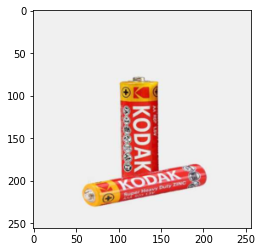

In [ ]:
i = 0
for img, label in dloader:
    plt.imshow((img[i].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
    plt.show()
    i = i + 1
    break

## 2.5 EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91120 entries, 0 to 99992
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   product_id                         91120 non-null  int64  
 1   category_id                        91120 non-null  int64  
 2   sale                               91120 non-null  bool   
 3   shop_id                            91120 non-null  int64  
 4   shop_title                         91120 non-null  object 
 5   rating                             91120 non-null  float64
 6   text_fields                        91120 non-null  object 
 7   category_name                      91120 non-null  object 
 8   title                              91120 non-null  object 
 9   description                        91120 non-null  object 
 10  attributes                         91120 non-null  object 
 11  custom_characteristics             91120 non-null  obj

<Axes: >

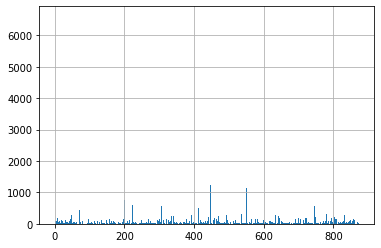

In [ ]:
# @title category_id
df['target'].hist(bins=df['target'].nunique())

<Axes: >

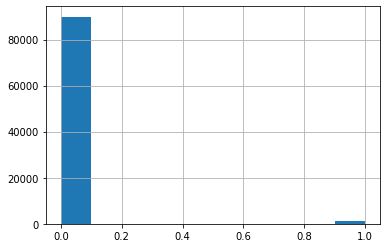

In [ ]:
# @title sale
df['sale'].astype(int).hist()

10549

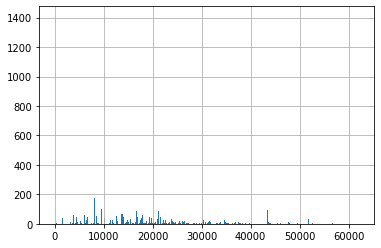

In [ ]:
# @title shop_id
df['shop_id'].hist(bins=df['shop_id'].nunique())
df['shop_id'].nunique()

<Axes: >

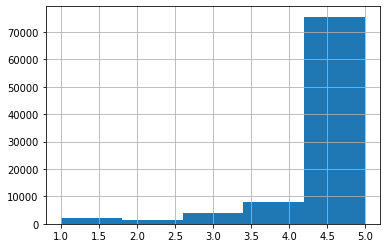

In [ ]:
# @title rating
df['rating'].hist(bins=5)

### Пересечение магазинов shop_title в train и test

In [ ]:
df['shop_title'].shape, df['shop_title'].nunique()

((91120,), 10549)

In [ ]:
df_test['shop_title'].shape, df_test['shop_title'].nunique()

((16860,), 5235)

In [ ]:
len(set(df_test['shop_title']).intersection(set(df['shop_title'])))

4658

Большинство магазинов из теста есть в обучающей выборке следует рассмотреть данны признак. Соответствует shop_id